<a href="https://colab.research.google.com/github/saidileep-knv/Customer-Churn-Analysis/blob/master/CustomerChurn_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import os
os.chdir("./gdrive/My Drive/Colab Notebooks")

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display

In [4]:
df = pd.read_csv("Telco_Customer_Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [0]:
df.set_index('customerID', inplace=True)

In [6]:
df.columns.to_list()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [0]:
df.columns = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 
              'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
              'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
              'MonthlyCharges', 'TotalCharges', 'Churn']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
Gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
Tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [9]:
print("No. of duplicated entries in the dataset = "+str(len(df[df.duplicated(keep=False)])))

No. of duplicated entries in the dataset = 42


In [0]:
##Convert TotalCharges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors ='coerce')
##Convert SeniorCitizen to object
df['SeniorCitizen'] = pd.Categorical(df["SeniorCitizen"])
##Convert Tenure to float
df['Tenure'] = df['Tenure'].astype(float)
##One-hot encoding of Churn column
df.Churn = df.Churn.apply(lambda x:1 if x=="Yes" else 0)

In [11]:
df.isnull().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [0]:
##Imputing missing values in the TotalCharges with mean
df.TotalCharges.fillna(df.TotalCharges.mean(), inplace = True)

In [13]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [0]:
!pip install lifelines
import lifelines
from lifelines import KaplanMeierFitter #Lifelines - Survival Analysis Library
kmf = KaplanMeierFitter()

In [0]:
import matplotlib.patches as mpt ##Custom Legends
from lifelines.statistics import logrank_test ##Survival Statistical Testing
sns.set_style('dark')
sns.set_context("paper")

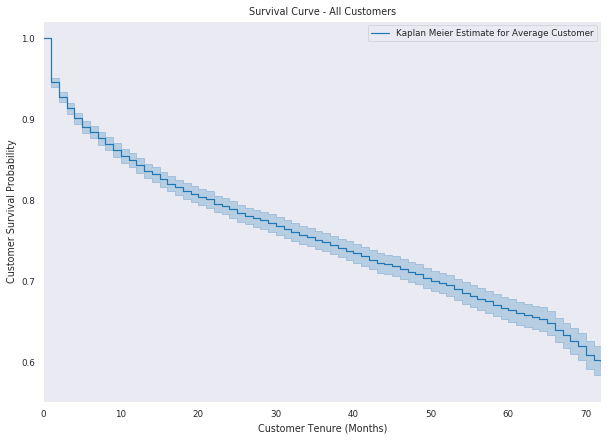

In [16]:
##Event is Churn.
T = df['Tenure']
E = df['Churn']
kmf.fit(T, E, label = "Kaplan Meier Estimate for Average Customer")
##Plot Kaplan Meier Curve to look at the survival rate for the average customer
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Survival Curve - All Customers')
ax.set_xlabel('Customer Tenure (Months)') 
ax.set_ylabel('Customer Survival Probability')
plt.show()
##print("Median Survival time of the averae customer is:",kmf.median_)

As can be expected for telecom industry, churn is realtively low. 
The company is able to retain approximately 60%  or more of the customers even after 72 months.

Text(0.5, 0, 'Tenure $t$')

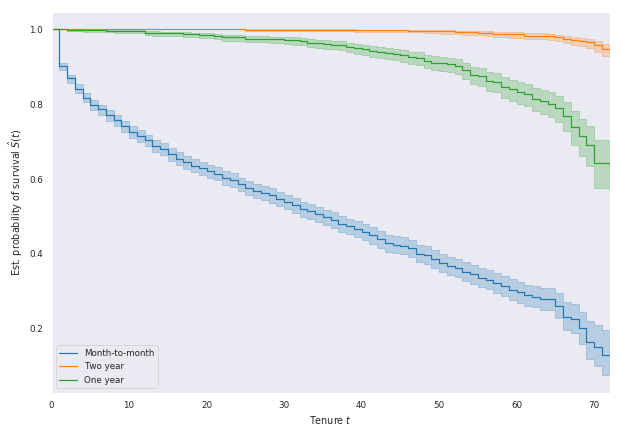

In [17]:
##Kaplan Meier Curves for Cohorts

groups = df['Contract'] ##Creating Cohorts from the "Contract" column
g1 = (groups == 'Month-to-month')
g2 = (groups == 'Two year')
g3 = (groups == 'One year')

fig, ax = plt.subplots(figsize=(10,7))

kmf.fit(T[g1], E[g1], label = "Month-to-month")
ax = kmf.plot(ax=ax)

kmf.fit(T[g2], E[g2], label = "Two year")
ax1 = kmf.plot(ax = ax)

kmf.fit(T[g3], E[g3], label = "One year")
kmf.plot(ax = ax1)
plt.ylabel("Est. probability of survival $\hat{S}(t)$")
plt.xlabel("Tenure $t$")

As can be depicted from the plot, customers with multi year contracts are less likely to cancel than those with month-to-month contracts.

Text(0.5, 0, 'tenure $t$')

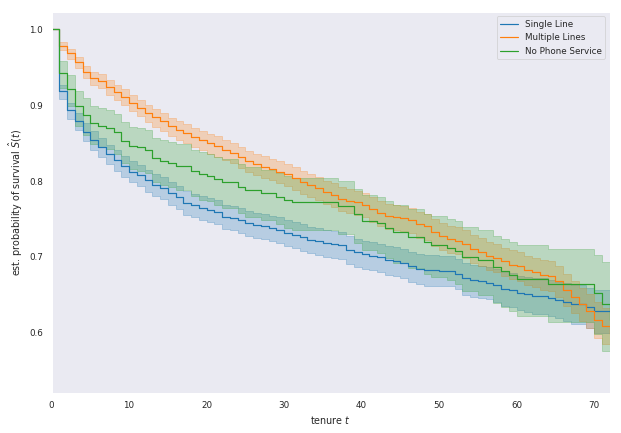

In [18]:
groups = df['MultipleLines']
g1 = (groups == 'No')
g2 = (groups == 'Yes')
g3 = (groups == "No phone service")

fig, ax = plt.subplots(figsize=(10,7))

kmf.fit(T[g1], E[g1], label = "Single Line")
ax = kmf.plot(ax=ax)

kmf.fit(T[g2], E[g2], label = "Multiple Lines")
ax1 = kmf.plot(ax = ax)

kmf.fit(T[g3], E[g3], label = "No Phone Service")
kmf.plot(ax = ax1)
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("tenure $t$")

In [0]:
categorical_feature_list = df.columns.drop(['Tenure','MonthlyCharges','TotalCharges', 'Churn'])
numeric_feature_list = ['Tenure','MonthlyCharges', 'TotalCharges']

In [20]:
categorical_feature_list

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [0]:
categorical_features_yes_no = list(['Partner', 'Dependents', 'PhoneService',
                                   'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                                   'DeviceProtection', 'TechSupport', 'StreamingTV',
                                   'StreamingMovies', 'PaperlessBilling'])

In [0]:
for col in list(categorical_features_yes_no):
  df[col] = df[col].apply(lambda x:1 if x=="Yes" else 0)

In [0]:
df.Gender = df.Gender.apply(lambda x:1 if x=="Female" else 0) 

In [24]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

One Hot Encoing of InternetService is as follows:

['FiberOptic'] = 0

['DSL'] = 1

['No'] = 0

In [0]:
for x in df.InternetService.value_counts().keys():
  df[x] = df.InternetService.apply(lambda d:1 if d==x else 0)
df.drop(columns=['InternetService'], inplace=True)

In [0]:
##Encoding in the similar manner for the columns : Contract and PaymentMethod
for x in df.Contract.value_counts().keys():
  df[x] = df.Contract.apply(lambda d:1 if d==x else 0)
df.drop(columns=['Contract'], inplace=True)

for x in df.PaymentMethod.value_counts().keys():
  df[x] = df.PaymentMethod.apply(lambda d:1 if d==x else 0)
df.drop(columns=['PaymentMethod'], inplace=True)

In [27]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1.0,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0
5575-GNVDE,0,0,0,0,34.0,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,0,0,1,0,1,0,0
3668-QPYBK,0,0,0,0,2.0,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,1,0,0,0,1,0,0
7795-CFOCW,0,0,0,0,45.0,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,0,0,1,0,0,1,0
9237-HQITU,1,0,0,0,2.0,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,1,0,0,1,0,0,0


In [0]:
##Store the formatted data file in xlsx format.
df.to_excel("Telco_CustomerChurn_Formatted.xlsx")

In [29]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.1)
cph.fit(df, 'Tenure','Churn', show_progress=True)
cph.print_summary()

Iteration 7: norm_delta = 0.00000, step_size = 1.0000, ll = -12659.69374, newton_decrement = 0.00000, seconds_since_start = 0.2Convergence completed after 7 iterations.
<lifelines.CoxPHFitter: fitted with 7043 observations, 5174 censored>
      duration col = 'Tenure'
         event col = 'Churn'
         penalizer = 0.1
number of subjects = 7043
  number of events = 1869
partial log-likelihood = -12659.69
  time fit was run = 2019-09-15 18:25:50 UTC

---
                           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
Gender                     0.04      1.04      0.05           -0.05            0.13                0.95                1.14
SeniorCitizen              0.03      1.04      0.06           -0.08            0.15                0.93                1.16
Partner                   -0.18      0.84      0.06           -0.29           -0.07                0.75                0.93
Dependents                -0.09      0.91   

Some of the Columns in the dataset have high collinearity i.e the column is equal to the linear combination of one or more other columns. 

The common cause of this is dummying categorical variables but not dropping a column, or some hierarchical structure in the dataset.

This can be found out by those having the large(absolute) magnitude in the coefs column of the print summary.



In [0]:
##Set the threshold at 1.00 and remove any column that has coef magbitude greater than 1.
##Also, gender does not give us any information on the Churning pattern.
columns_to_drop = list(['Gender','Fiber optic', 'No', 'Month-to-month', 'Two year'])
df = df.drop(columns=columns_to_drop, axis = 1)

In [31]:
cph = CoxPHFitter(penalizer=0.1)
cph.fit(df, 'Tenure','Churn', show_progress=True)
cph.print_summary()

Iteration 6: norm_delta = 0.00002, step_size = 1.0000, ll = -12911.84966, newton_decrement = 0.00000, seconds_since_start = 0.2Convergence completed after 6 iterations.
<lifelines.CoxPHFitter: fitted with 7043 observations, 5174 censored>
      duration col = 'Tenure'
         event col = 'Churn'
         penalizer = 0.1
number of subjects = 7043
  number of events = 1869
partial log-likelihood = -12911.85
  time fit was run = 2019-09-15 18:26:25 UTC

---
                           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
SeniorCitizen              0.08      1.08      0.06           -0.03            0.19                0.97                1.21
Partner                   -0.20      0.82      0.06           -0.30           -0.09                0.74                0.92
Dependents                -0.15      0.86      0.07           -0.28           -0.01                0.75                0.99
PhoneService              -1.19      0.30   

The key factor to consider from the above summary is the exp(coef) which is interpreted as the scaling of hazard risk for each additional unit of variable, 1.00 being neutral.

The unusual high magnitude of the DSL in the exp(coef) suggest that a customer who is using InternetService by DSL is 3.89 times likely to cancel their service.

Any column that has exp(coef) value below 1.00 shows that the customer is less likely to churn.

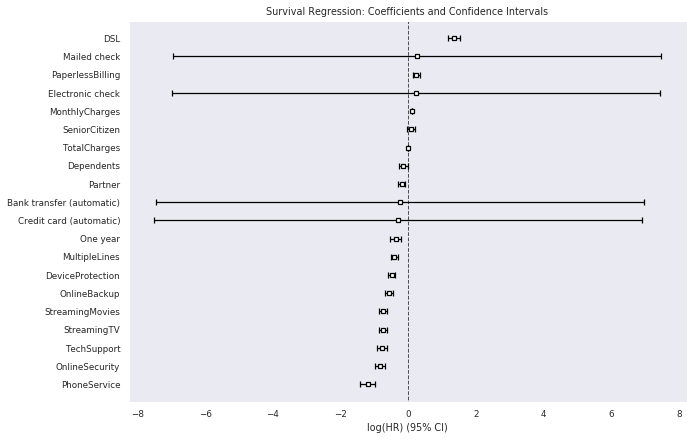

In [32]:
##Plotting Coefficient Outputs and their Confidence Intervals
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("Survival Regression: Coefficients and Confidence Intervals")
cph.plot(ax=ax)

Any customer with the covariates rightside of log(HR) = 0 state a significant impact on the churn and the company needs to take special care to retain the customer.